In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Fridge.csv")
df.head()

,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.65,low,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.65,high,1,ddos


In [3]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date            time  fridge_temperature  \
59     1556245360  25-Apr-19       19:22:40                 3.20   
157    1556245775  25-Apr-19       19:29:35                 1.00   
237    1556246026  25-Apr-19       19:33:46                 2.00   
281    1556246171  25-Apr-19       19:36:11                 6.25   
289    1556246196  25-Apr-19       19:36:36                 8.65   
...           ...        ...             ...                 ...   
59929  1554203235   2-Apr-19     04:07:15                   7.50   
59932  1554203235   2-Apr-19     04:07:15                   4.00   
59934  1554203235   2-Apr-19     04:07:15                   2.00   
59936  1554203235   2-Apr-19     04:07:15                  12.95   
59939  1554203235   2-Apr-19     04:07:15                   7.65   

      temp_condition  label    type  
59               low      1    ddos  
157              low      1    ddos  
237              low      1    ddos  
281             high      

In [4]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                    count  percentage
ts                      0         0.0
date                    0         0.0
time                    0         0.0
fridge_temperature      0         0.0
temp_condition          0         0.0
label                   0         0.0
type                    0         0.0


In [5]:
type('date')

str

In [6]:
type('time')

str

In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date            time  fridge_temperature  \
0      1556245180 2019-04-25       19:19:40                 9.00   
1      1556245180 2019-04-25       19:19:40                 9.25   
2      1556245185 2019-04-25       19:19:45                12.65   
3      1556245185 2019-04-25       19:19:45                 4.65   
4      1556245195 2019-04-25       19:19:55                12.65   
...           ...        ...             ...                 ...   
59938  1554203235 2019-04-02     04:07:15                   9.85   
59940  1554203235 2019-04-02     04:07:15                  13.85   
59941  1554203235 2019-04-02     04:07:15                   5.40   
59942  1554203235 2019-04-02     04:07:15                   2.90   
59943  1554203235 2019-04-02     04:07:15                   7.85   

      temp_condition  label    type  
0               high      1    ddos  
1               high      1    ddos  
2               high      1    ddos  
3                low      1    

In [8]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [9]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [10]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [11]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [12]:
df['month'] = df['month'].astype(int)

In [13]:
df['hour'] = df['hour'].astype(int)

In [14]:
df.month.unique()

array([4, 3])

In [15]:
df.hour.unique()

array([19, 14, 15,  6,  7,  8, 12, 20, 21,  0,  1, 16, 17,  9, 18,  4, 13,
        3,  5])

In [16]:
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/12))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/12))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [17]:
df

,ts,date,time,fridge_temperature,temp_condition,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556245180,2019-04-25,19:19:40,9.00,high,1,ddos,2019,4,Thursday,19,19,40,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
1,1556245180,2019-04-25,19:19:40,9.25,high,1,ddos,2019,4,Thursday,19,19,40,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
2,1556245185,2019-04-25,19:19:45,12.65,high,1,ddos,2019,4,Thursday,19,19,45,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
3,1556245185,2019-04-25,19:19:45,4.65,low,1,ddos,2019,4,Thursday,19,19,45,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
4,1556245195,2019-04-25,19:19:55,12.65,high,1,ddos,2019,4,Thursday,19,19,55,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59938,1554203235,2019-04-02,04:07:15,9.85,high,0,normal,2019,4,Tuesday,4,07,15,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59940,1554203235,2019-04-02,04:07:15,13.85,high,0,normal,2019,4,Tuesday,4,07,15,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59941,1554203235,2019-04-02,04:07:15,5.40,low,0,normal,2019,4,Tuesday,4,07,15,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59942,1554203235,2019-04-02,04:07:15,2.90,low,0,normal,2019,4,Tuesday,4,07,15,1.000000e+00,6.123234e-17,1.0,6.123234e-17


In [18]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                    count  percentage
ts                      0         0.0
date                    0         0.0
time                    0         0.0
fridge_temperature      0         0.0
temp_condition          0         0.0
label                   0         0.0
type                    0         0.0
year                    0         0.0
month                   0         0.0
day_name                0         0.0
hour                    0         0.0
min                     0         0.0
sec                     0         0.0
hour_sin                0         0.0
hour_cos                0         0.0
month_sin               0         0.0
month_cos               0         0.0


In [19]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec'], axis=1)

In [20]:
df

,fridge_temperature,temp_condition,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,9.00,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
1,9.25,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
2,12.65,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
3,4.65,low,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
4,12.65,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
59938,9.85,high,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59940,13.85,high,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59941,5.40,low,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59942,2.90,low,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17


In [21]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [22]:
type('hour')

str

In [23]:
# transform int to string
df['label'] = df['label'].astype(str)

In [24]:
df.temp_condition.unique()

array(['high', 'low', 'high ', 'low ', 'low  ', 'high  '], dtype=object)

In [25]:
df.temp_condition.replace(['high ', 'low ', 'low  ', 'high  '], ['high','low','low','high'], inplace=True)

In [26]:
df.temp_condition.unique()

array(['high', 'low'], dtype=object)

In [27]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [28]:
num_list


['fridge_temperature',
 'year',
 'month',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [29]:
cat_list

['temp_condition', 'day_name']

In [30]:
### 2. Feature Engineering and EDA  ###

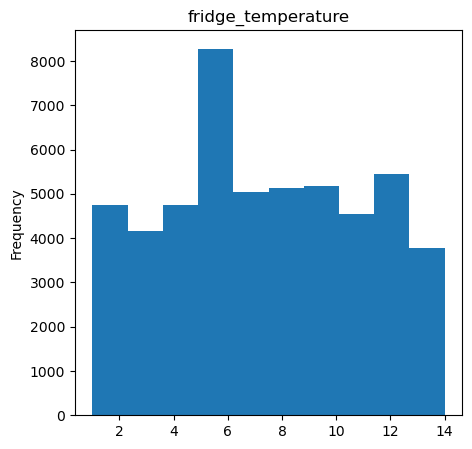

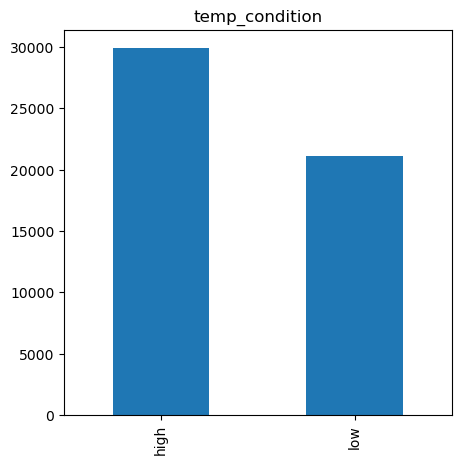

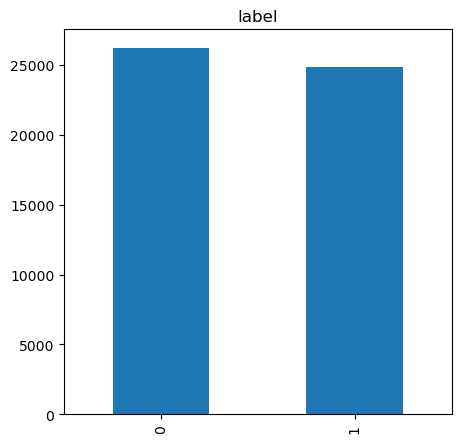

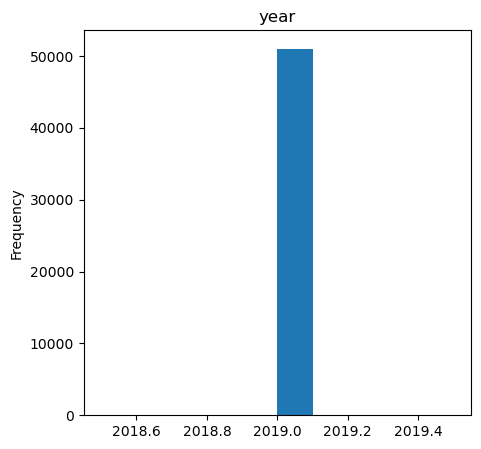

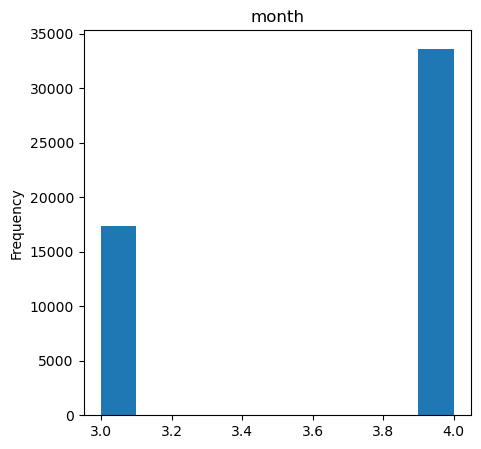

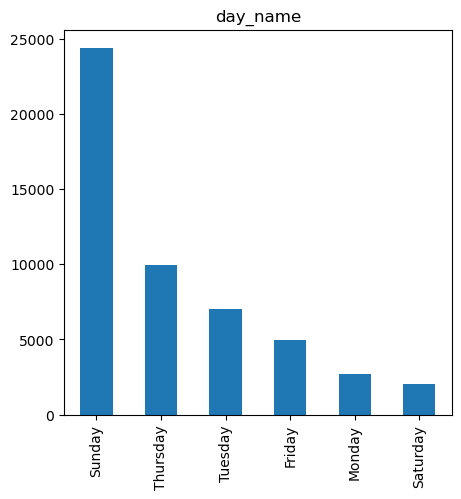

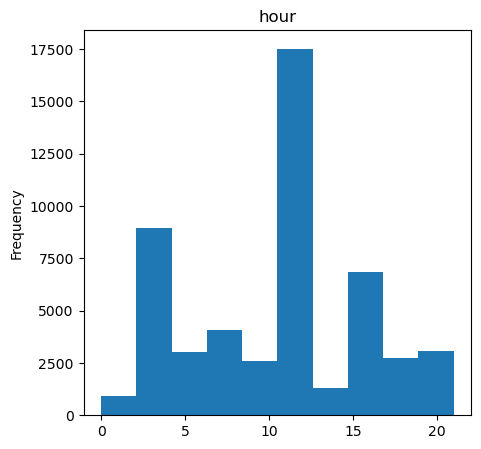

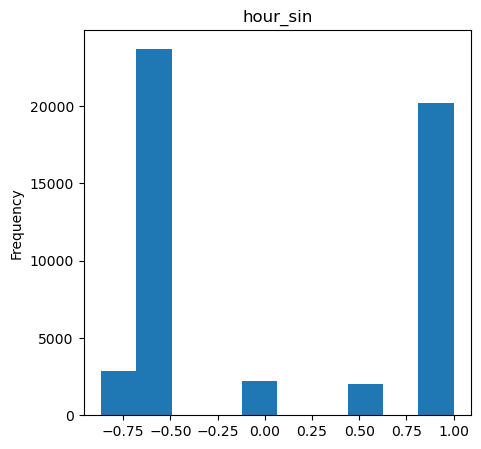

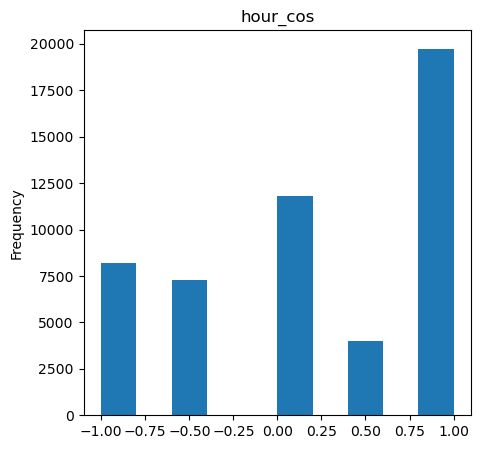

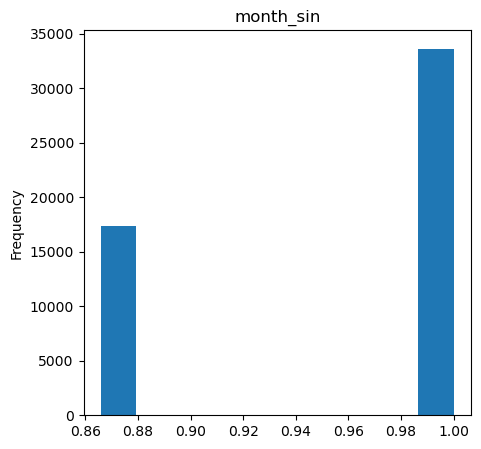

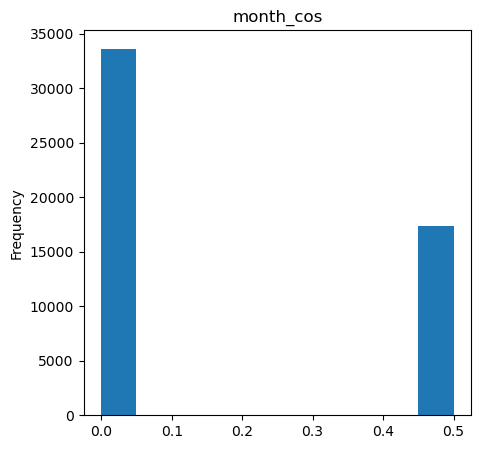

In [31]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [32]:
df

,fridge_temperature,temp_condition,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,9.00,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
1,9.25,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
2,12.65,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
3,4.65,low,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
4,12.65,high,1,2019,4,Thursday,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
59938,9.85,high,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59940,13.85,high,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59941,5.40,low,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59942,2.90,low,0,2019,4,Tuesday,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17


In [33]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [34]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [35]:
df=encoder.fit_transform(df) 

In [36]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'temp_condition', 'mapping': {'low': 0, 'high': 1}}]
oe = OrdinalEncoder(mapping=maplist)

In [37]:
df=oe.fit_transform(df) 

In [38]:
df

,fridge_temperature,temp_condition,label,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,9.00,1,1,2019,4,0,0,1,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
1,9.25,1,1,2019,4,0,0,1,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
2,12.65,1,1,2019,4,0,0,1,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
3,4.65,0,1,2019,4,0,0,1,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
4,12.65,1,1,2019,4,0,0,1,19,3.673940e-16,-1.000000e+00,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59938,9.85,1,0,2019,4,1,0,0,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59940,13.85,1,0,2019,4,1,0,0,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59941,5.40,0,0,2019,4,1,0,0,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17
59942,2.90,0,0,2019,4,1,0,0,4,1.000000e+00,6.123234e-17,1.0,6.123234e-17


In [39]:
list(df.columns)

['fridge_temperature',
 'temp_condition',
 'label',
 'year',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

<AxesSubplot:>

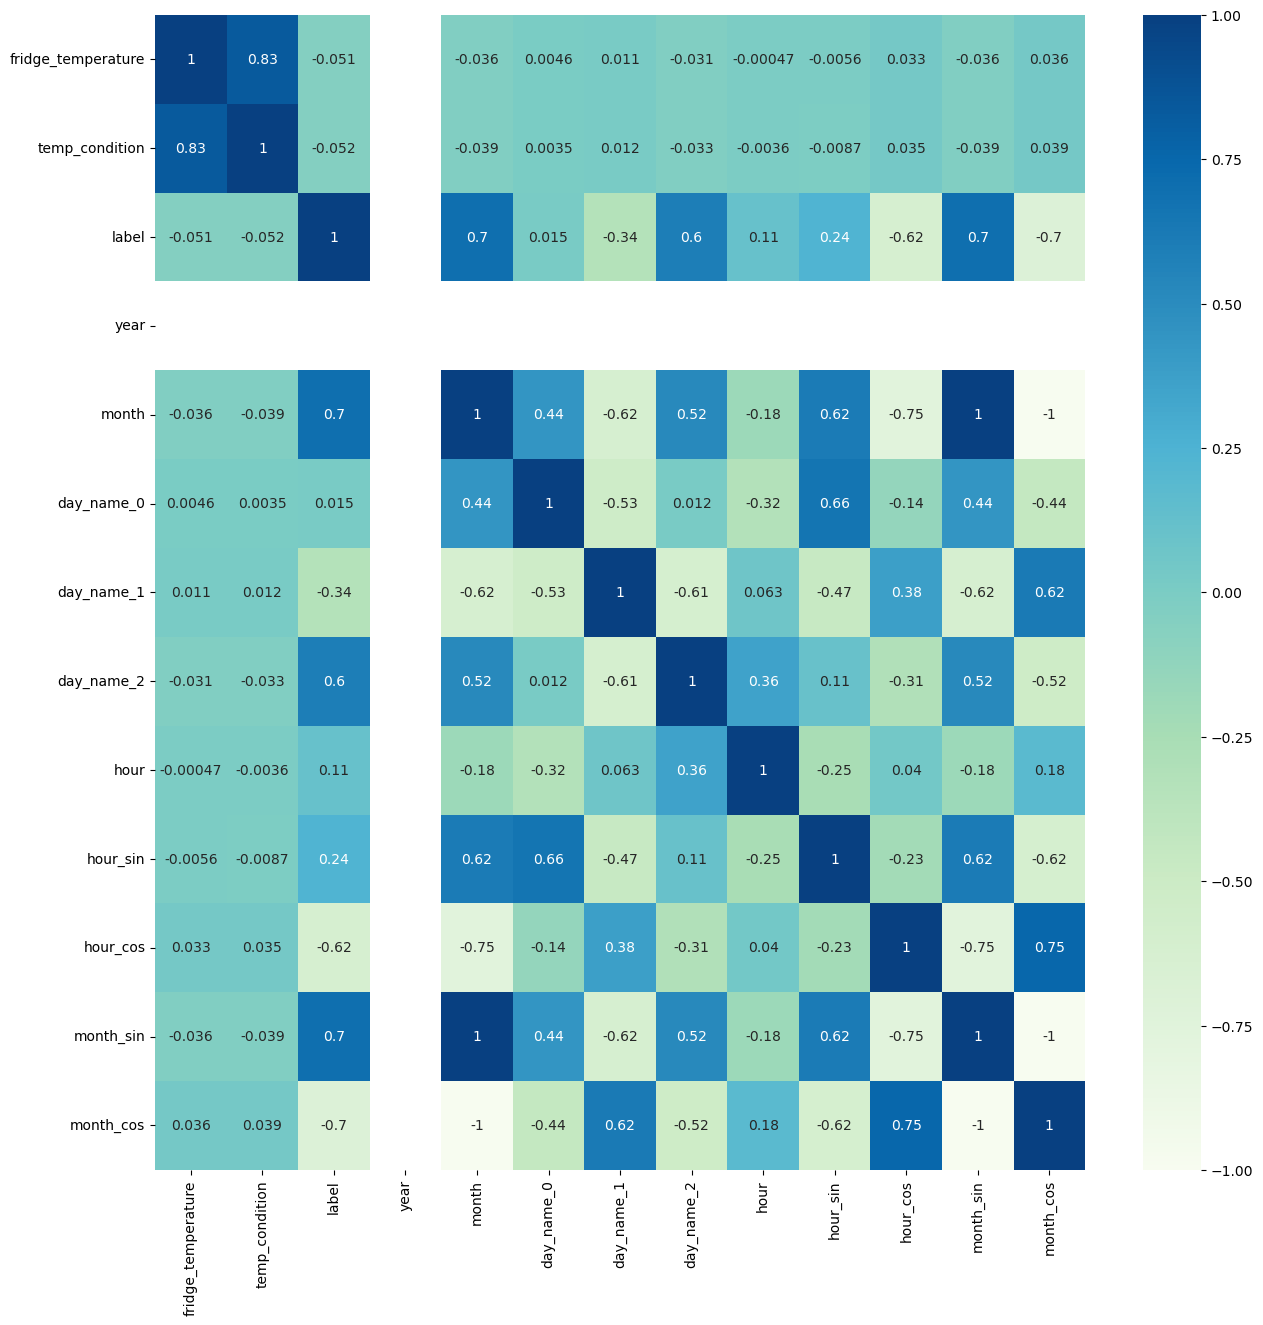

In [40]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [41]:
# select and rearrange columns
df = df[['fridge_temperature',
 'temp_condition',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','label']]

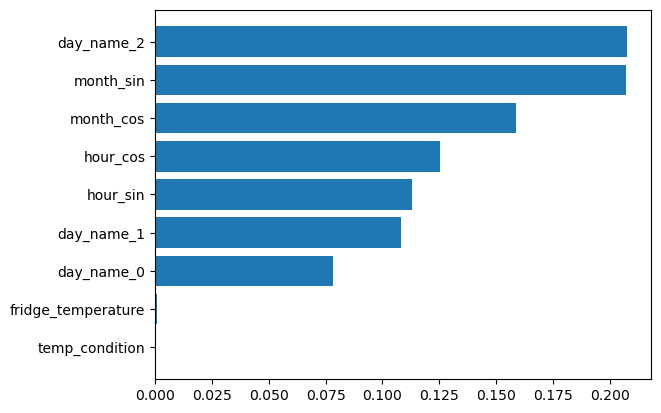

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865
           1       1.00      1.00      1.00      7448

    accuracy                           1.00     15313
   macro avg       1.00      1.00      1.00     15313
weighted avg       1.00      1.00      1.00     15313



In [44]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


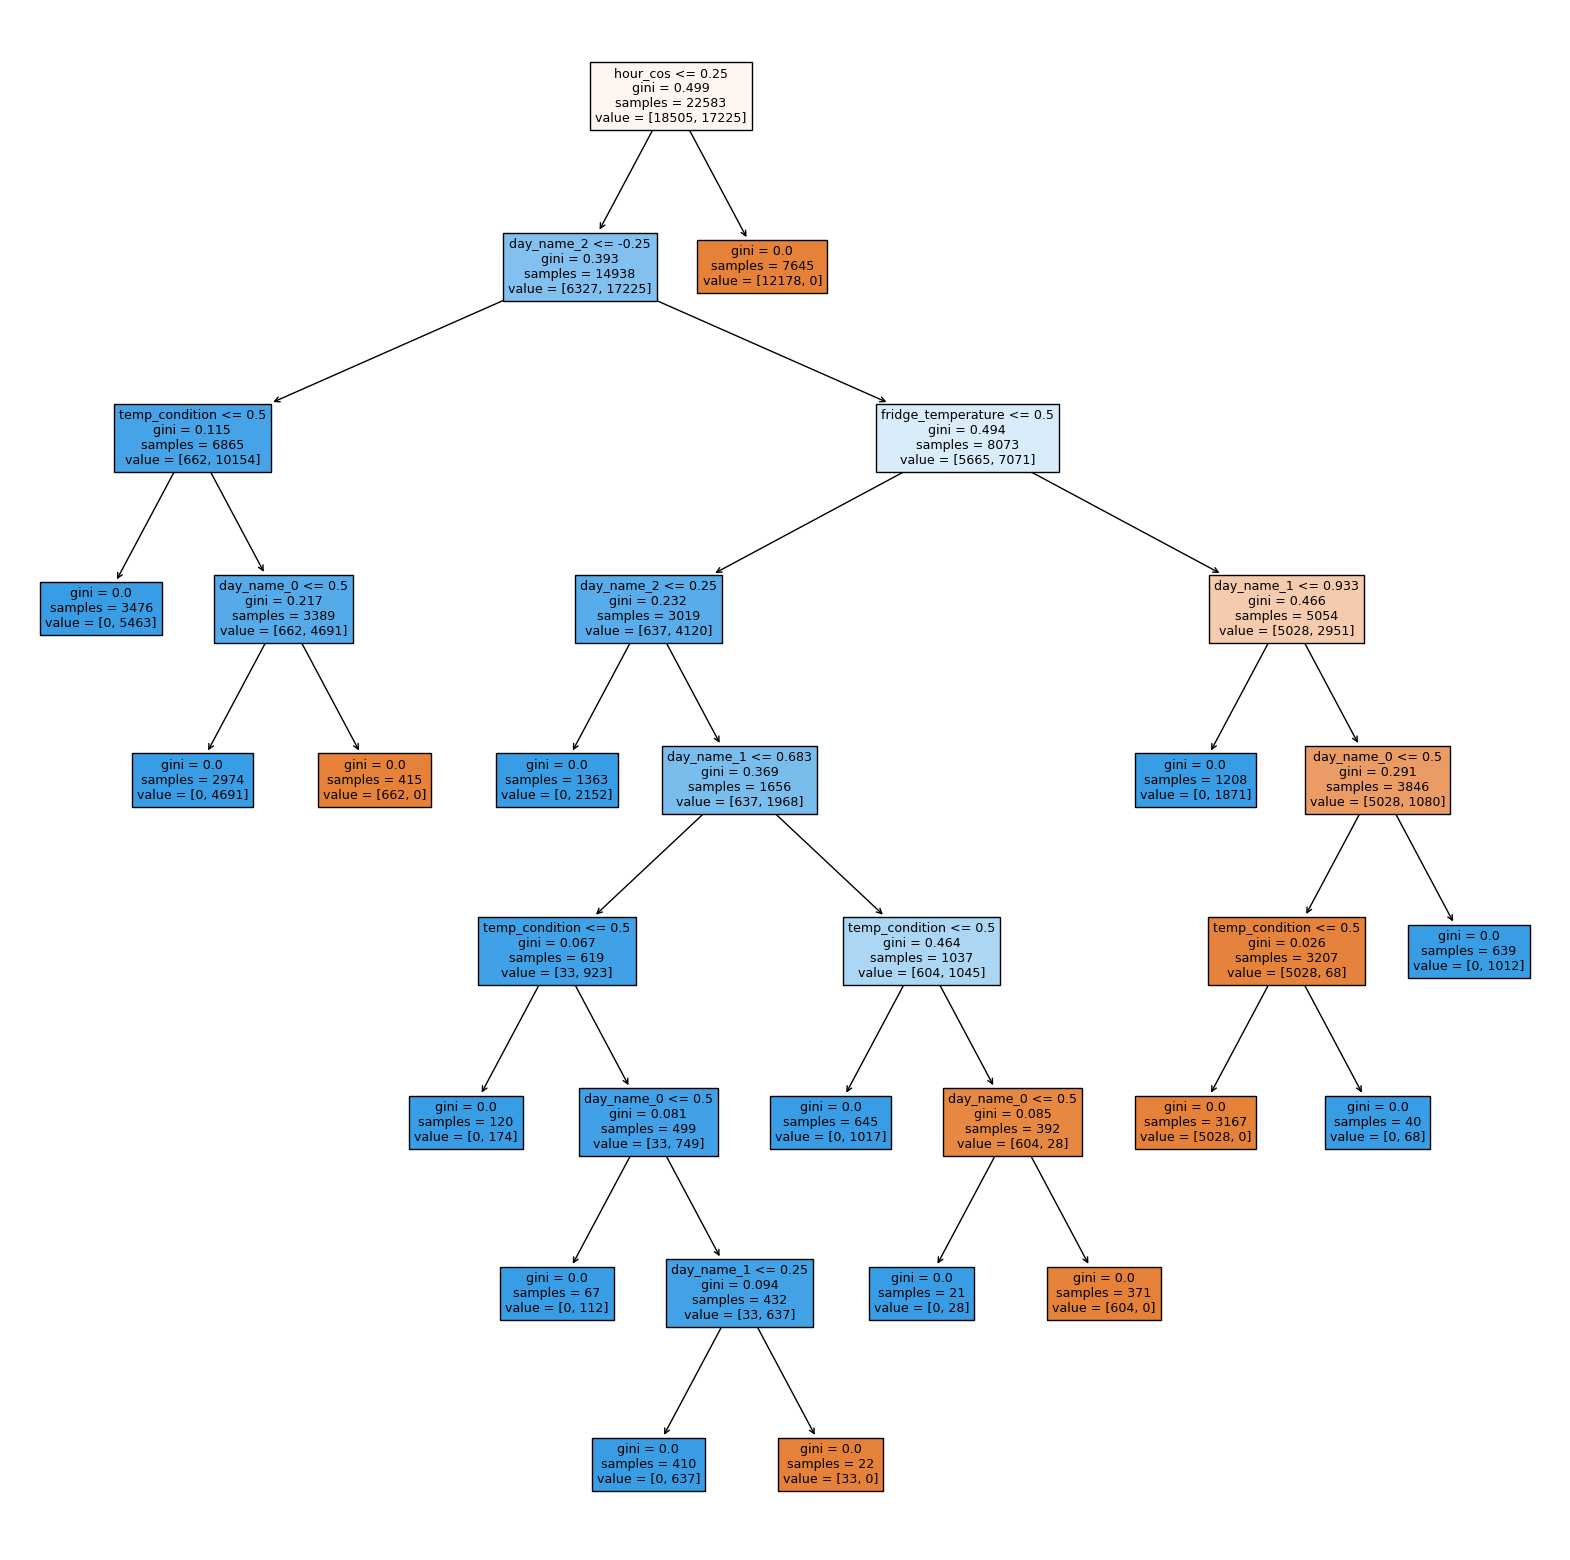

In [45]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [46]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

month_cos             0.208725
day_name_2            0.186642
hour_cos              0.164826
month_sin             0.146419
day_name_1            0.110028
hour_sin              0.106841
day_name_0            0.075922
fridge_temperature    0.000501
temp_condition        0.000095
dtype: float64

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[7865    0]
 [   0 7448]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865
           1       1.00      1.00      1.00      7448

    accuracy                           1.00     15313
   macro avg       1.00      1.00      1.00     15313
weighted avg       1.00      1.00      1.00     15313

1.0


In [48]:
df

,fridge_temperature,temp_condition,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos,label
0,9.00,1,0,0,1,3.673940e-16,-1.000000e+00,1.0,6.123234e-17,1
1,9.25,1,0,0,1,3.673940e-16,-1.000000e+00,1.0,6.123234e-17,1
2,12.65,1,0,0,1,3.673940e-16,-1.000000e+00,1.0,6.123234e-17,1
3,4.65,0,0,0,1,3.673940e-16,-1.000000e+00,1.0,6.123234e-17,1
4,12.65,1,0,0,1,3.673940e-16,-1.000000e+00,1.0,6.123234e-17,1
...,...,...,...,...,...,...,...,...,...,...
59938,9.85,1,1,0,0,1.000000e+00,6.123234e-17,1.0,6.123234e-17,0
59940,13.85,1,1,0,0,1.000000e+00,6.123234e-17,1.0,6.123234e-17,0
59941,5.40,0,1,0,0,1.000000e+00,6.123234e-17,1.0,6.123234e-17,0
59942,2.90,0,1,0,0,1.000000e+00,6.123234e-17,1.0,6.123234e-17,0


In [49]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify =y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35730, 9) (15313, 9) (35730,) (15313,)


In [50]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, max_depth=10,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [51]:
len(regressor.estimators_)

20

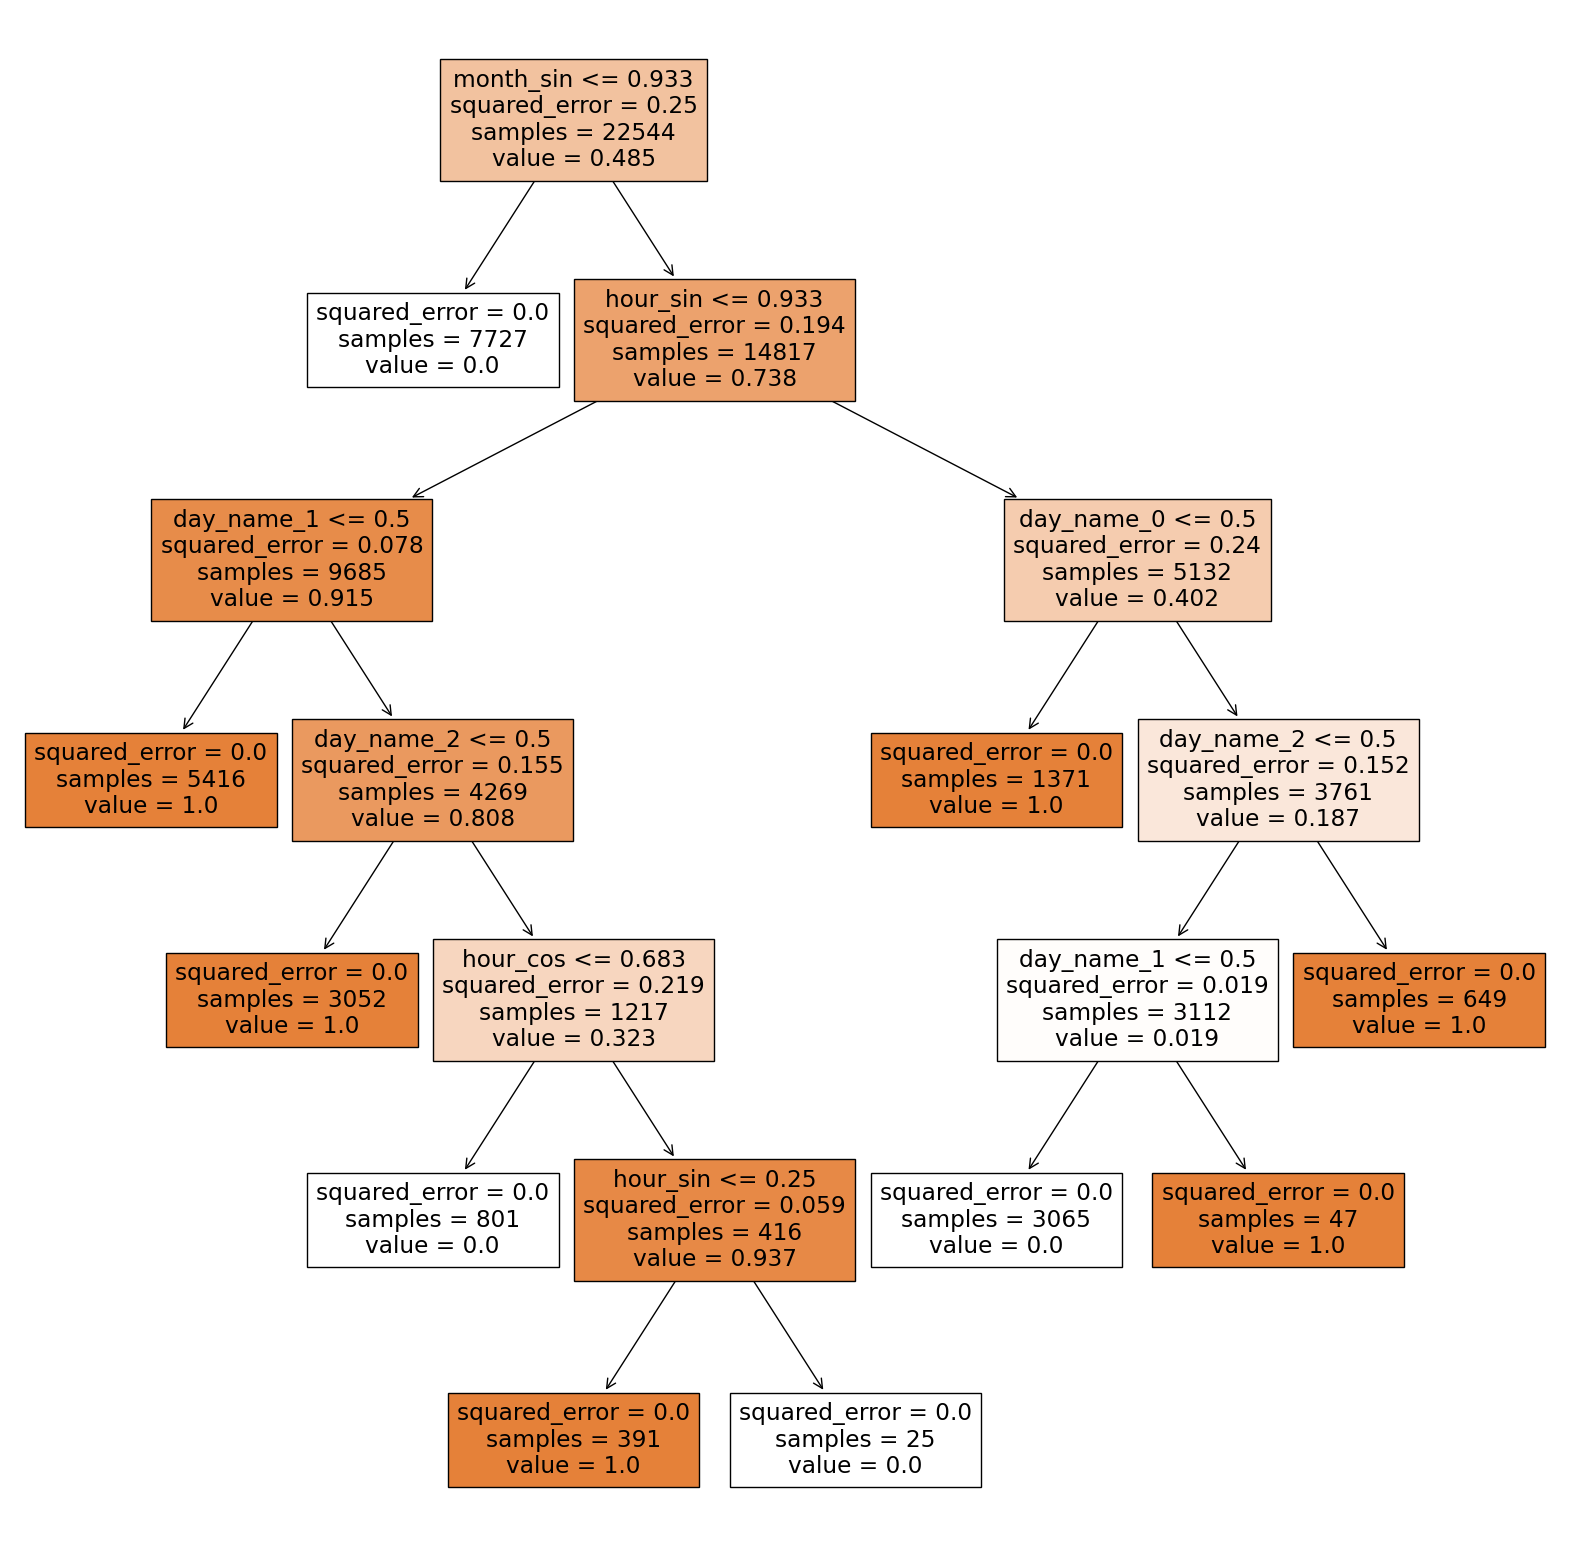

In [52]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[7865    0]
 [   0 7448]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865
           1       1.00      1.00      1.00      7448

    accuracy                           1.00     15313
   macro avg       1.00      1.00      1.00     15313
weighted avg       1.00      1.00      1.00     15313

1.0


In [54]:
### 3. Model Building  ###

# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify =y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

(35730, 9) (15313, 9) (35730,) (15313,)


Accuracy: 0.965519493241037
AUC: 0.94


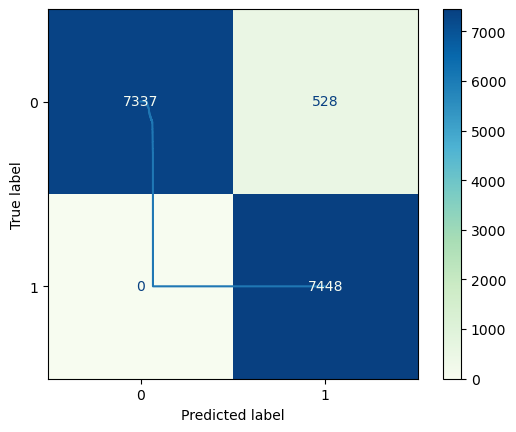

In [55]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))

In [56]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9657676348547718

In [57]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

1.0

In [58]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9338014042126379